**importing and visualizing datasets**

In [ ]:
#Libraries
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms #using inbuilt dataset inside pytorch
from torch import nn, optim  # for neural network training

**Loading Dataset**

In [ ]:

# Setting random seed for reproducibility
torch.manual_seed(42)

batch_size = 64

# Defining data transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Loading MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainset, valset = torch.utils.data.random_split(trainset, [50000, 10000])
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 130910838.08it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 27197057.44it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34009625.70it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7441612.80it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**Visualizing the Dataset**

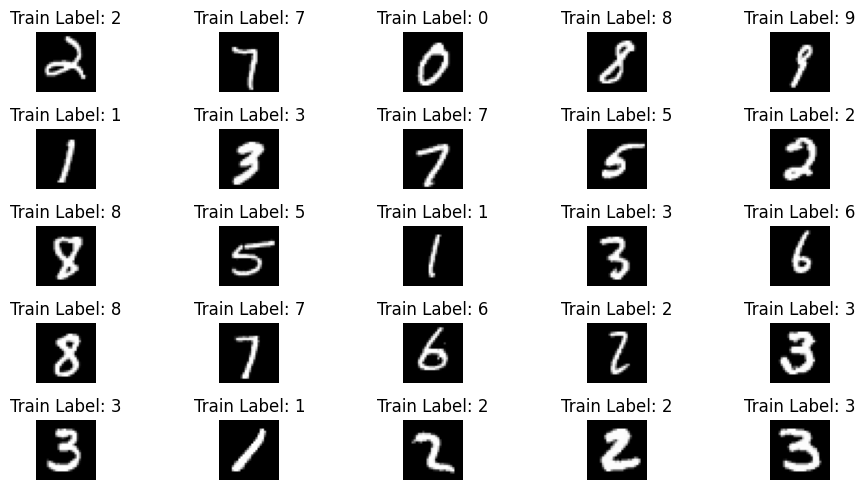

In [ ]:
# Createing a 5x5 subplot grid for visualization
fig, axes = plt.subplots(5, 5, figsize=(10, 5))
axes = axes.ravel()

for i, (images, labels) in enumerate(trainloader):
    for j in range(25):
        ax = axes[j]
        ax.imshow(images[j].squeeze().numpy(), cmap='gray')
        ax.set_title(f'Train Label: {labels[j]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    if i == 0:
        break

**Convolution Neural Network class**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()


**Neural Network description**

In [ ]:
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


**Training the neural network**

In [ ]:
import time
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
number_epochs=15
# Training loop
train_loss = []
val_loss = []
acccur = []
time1 = time.time()
for epoch in range(number_epochs):
    running_train_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss.append(running_train_loss / len(trainloader))

    # Validation
    correct = 0
    total = 0
    running_val_loss = 0.0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss.append(running_val_loss / len(valloader))
    accuracy = 100 * correct / total
    acccur.append(accuracy)

    print(f"Epoch {epoch + 1}/{number_epochs}, Train Loss: {train_loss[-1]:.4f}, "
          f"Val Loss: {val_loss[-1]:.4f}, Accuracy: {accuracy:.2f}%")

time2 = time.time()
t = time2-time1
print(f"Training is finished. Total Time taken {t}")



Epoch 1/15, Train Loss: 0.1710, Val Loss: 0.0597, Accuracy: 98.21%
Epoch 2/15, Train Loss: 0.0467, Val Loss: 0.0480, Accuracy: 98.57%
Epoch 3/15, Train Loss: 0.0313, Val Loss: 0.0432, Accuracy: 98.73%
Epoch 4/15, Train Loss: 0.0226, Val Loss: 0.0415, Accuracy: 98.84%
Epoch 5/15, Train Loss: 0.0165, Val Loss: 0.0411, Accuracy: 98.86%
Epoch 6/15, Train Loss: 0.0140, Val Loss: 0.0436, Accuracy: 98.88%
Epoch 7/15, Train Loss: 0.0114, Val Loss: 0.0410, Accuracy: 98.91%
Epoch 8/15, Train Loss: 0.0096, Val Loss: 0.0453, Accuracy: 98.82%
Epoch 9/15, Train Loss: 0.0095, Val Loss: 0.0439, Accuracy: 98.88%
Epoch 10/15, Train Loss: 0.0062, Val Loss: 0.0548, Accuracy: 98.83%
Epoch 11/15, Train Loss: 0.0052, Val Loss: 0.0532, Accuracy: 98.77%
Epoch 12/15, Train Loss: 0.0086, Val Loss: 0.0477, Accuracy: 98.73%
Epoch 13/15, Train Loss: 0.0051, Val Loss: 0.0640, Accuracy: 98.66%
Epoch 14/15, Train Loss: 0.0055, Val Loss: 0.0509, Accuracy: 98.94%
Epoch 15/15, Train Loss: 0.0029, Val Loss: 0.0462, Accura

## **Tasks for Part 1**

**1. Plots of training and validation**

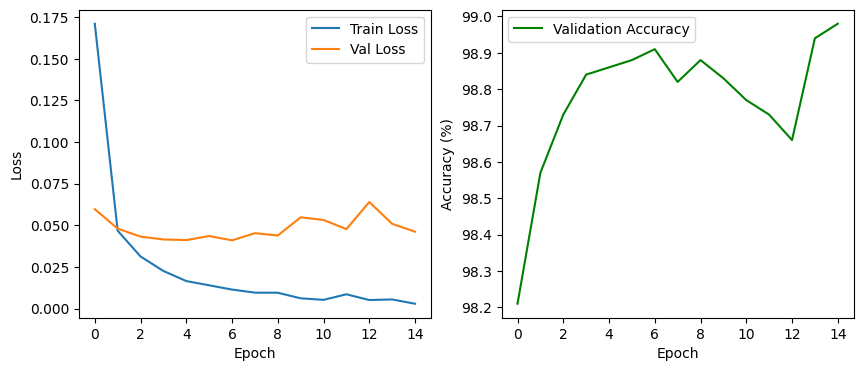

Test Accuracy: 99.16%


In [ ]:
# Ploting training and validation loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Ploting accuracy
plt.subplot(1, 2, 2)
plt.plot(acccur, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Testing the network on the test dataset
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

**2. Plot of randomly selected test images**

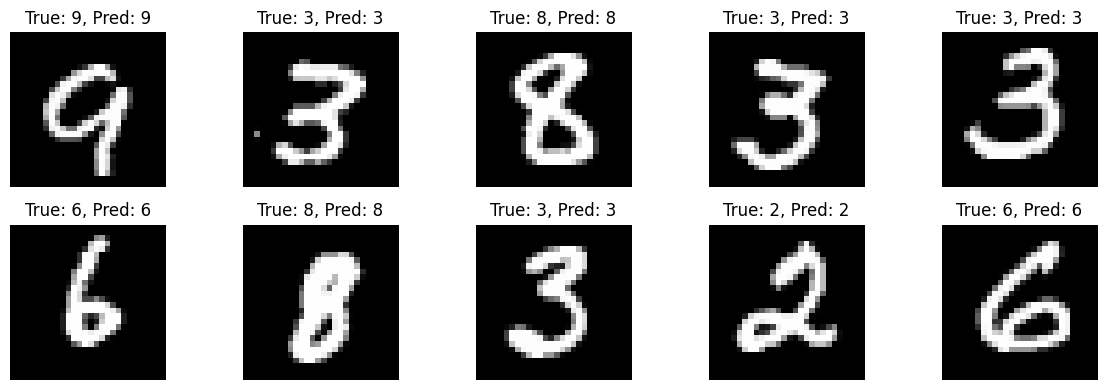

In [ ]:
# Plot random test images with true and predicted labels
num_images_to_show = 10
random_indices = np.random.choice(len(testset), num_images_to_show, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    image, label = testset[idx]
    output = net(image.unsqueeze(0))  # Predict the class
    _, predicted_class = torch.max(output, 1)
    image = image.squeeze().numpy()
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {label}, Pred: {predicted_class.item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()


**3. Reporting dimension of input and output layer**

In [ ]:
from torchsummary import summary
batch = next(iter(trainloader))
inputs, labels = batch
print("Shape of input data:", inputs.shape)
summary(net, input_size=(1, 28, 28), batch_size=64)

Shape of input data: torch.Size([64, 1, 28, 28])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [64, 32, 28, 28]             320
         MaxPool2d-2           [64, 32, 14, 14]               0
            Conv2d-3           [64, 32, 14, 14]           9,248
         MaxPool2d-4             [64, 32, 7, 7]               0
            Linear-5                  [64, 500]         784,500
            Linear-6                   [64, 10]           5,010
Total params: 799,078
Trainable params: 799,078
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 19.39
Params size (MB): 3.05
Estimated Total Size (MB): 22.63
----------------------------------------------------------------


**4.Number of Parameters**


As we can see from the summary the number of parameters at different layers is:
1. Total params: 799,078
2. first convolutional layer params: 320
3. second convolution layer params: 9248
4. fully connected layer params: 784500 + 5010=789510




**5. Number of Neurons**


1.   The number of neurons in conv layer 1 + conv layer 2 is given by $(32 * 28 * 28) + (32 * 14 * 14) = 31360 $
2.   The number neurons in fully conected layer is striaghtforward $500+10=510$
3. Total number of neurons = $31360+510=31870$



**6. Batch Normalization**

In [ ]:
#Defining the CNN architecture again with batch Normalization
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 10)

        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn_fc1 = nn.BatchNorm1d(500)

    def forward(self, x):
        x = self.bn1(self.pool(nn.ReLU()(self.conv1(x))))
        x = self.bn2(self.pool(nn.ReLU()(self.conv2(x))))
        x = x.view(-1, 32 * 7 * 7)
        x = self.bn_fc1(nn.ReLU()(self.fc1(x)))
        x = self.fc2(x)
        return x

net = Net()

In [ ]:
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_fc1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
number_epochs= 15
# Training loop
train_loss = []
val_loss = []
acccur = []
t3 = time.time()
for epoch in range(number_epochs):
    running_train_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    train_loss.append(running_train_loss / len(trainloader))

    # Validation
    correct = 0
    total = 0
    running_val_loss = 0.0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss.append(running_val_loss / len(valloader))
    accuracy = 100 * correct / total
    acccur.append(accuracy)

    print(f"Epoch {epoch + 1}/{number_epochs}, Train Loss: {train_loss[-1]:.4f}, "
          f"Val Loss: {val_loss[-1]:.4f}, Accuracy: {accuracy:.2f}%")
t4 = time.time()
t5 = t4-t3
print(f"Training is finished. time taken {t5}")




Epoch 1/15, Train Loss: 0.0919, Val Loss: 0.0547, Accuracy: 98.25%
Epoch 2/15, Train Loss: 0.0404, Val Loss: 0.0445, Accuracy: 98.71%
Epoch 3/15, Train Loss: 0.0264, Val Loss: 0.0428, Accuracy: 98.69%
Epoch 4/15, Train Loss: 0.0200, Val Loss: 0.0391, Accuracy: 98.87%
Epoch 5/15, Train Loss: 0.0139, Val Loss: 0.0509, Accuracy: 98.58%
Epoch 6/15, Train Loss: 0.0145, Val Loss: 0.0430, Accuracy: 98.68%
Epoch 7/15, Train Loss: 0.0151, Val Loss: 0.0466, Accuracy: 98.81%
Epoch 8/15, Train Loss: 0.0120, Val Loss: 0.0418, Accuracy: 98.97%
Epoch 9/15, Train Loss: 0.0067, Val Loss: 0.0417, Accuracy: 98.97%
Epoch 10/15, Train Loss: 0.0060, Val Loss: 0.0602, Accuracy: 98.72%
Epoch 11/15, Train Loss: 0.0078, Val Loss: 0.0472, Accuracy: 98.83%
Epoch 12/15, Train Loss: 0.0047, Val Loss: 0.0445, Accuracy: 98.99%
Epoch 13/15, Train Loss: 0.0090, Val Loss: 0.0421, Accuracy: 98.93%
Epoch 14/15, Train Loss: 0.0059, Val Loss: 0.0446, Accuracy: 98.88%
Epoch 15/15, Train Loss: 0.0043, Val Loss: 0.0486, Accura

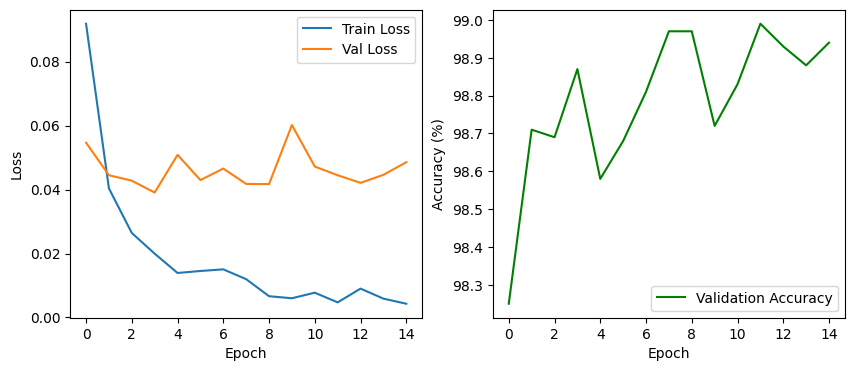

Test Accuracy: 98.99%


In [ ]:
# Ploting training and validation loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Ploting accuracy
plt.subplot(1, 2, 2)
plt.plot(acccur, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Testing the network on the test dataset
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")



1.   The accuracy in both the cases are identical it is 99 percent so our CNN overfits.
2.   There is an improvement in the training time for batch normalization case. For 15 epochs batch normalization is faster.



## **2.** **Visulalizing Convolutional Neural Network**

**Convolution 1 filters**

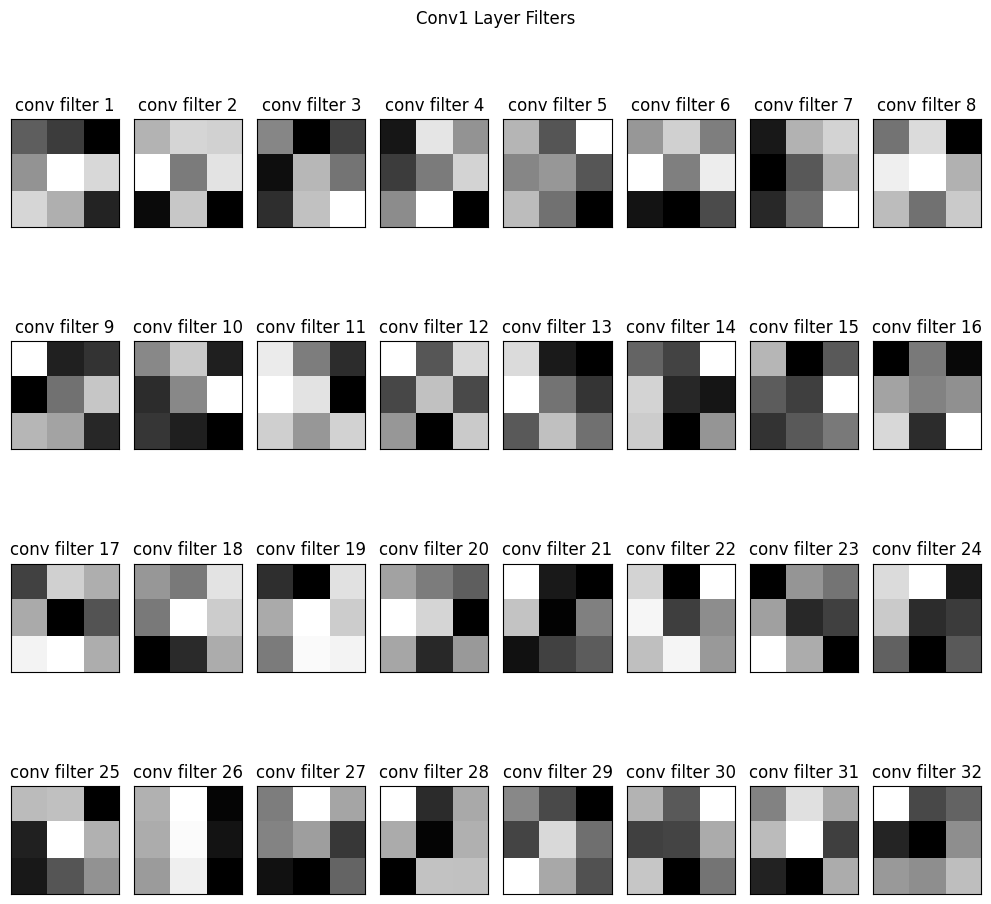

In [ ]:

# Function to plot filters in a grid
def plot_filters(filters, title, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(filters[i, 0, :, :], cmap='gray')
        ax.set_title(f'conv filter {i+1}')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

conv1_filters = net.conv1.weight.data.cpu().numpy()
plot_filters(conv1_filters, 'Conv1 Layer Filters', 4, 8)






**Convolution layer 2 filters**

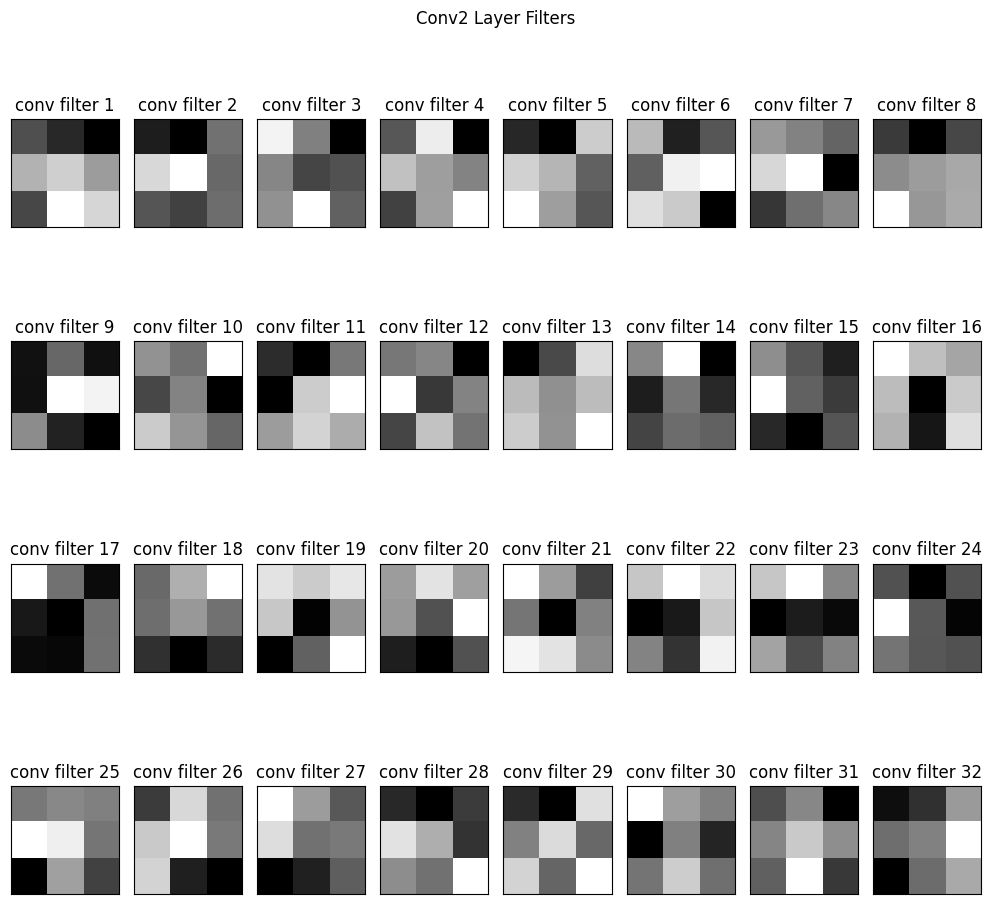

In [ ]:
# 2. Ploting filters of a higher layer (conv2) and compare with 'conv1' layer filters
conv2_filters = net.conv2.weight.data.cpu().numpy()
plot_filters(conv2_filters, 'Conv2 Layer Filters', 4, 8)


**About Convolution filters**

1.   Conv1 filters works towards edge detection, Blob and Corner Detection and sometimes texture and gradient detection.
2.   While conv2 filters are complex feature detectors they work towards detection combinations of edges, textures, and simple shapes and their distinctiveness. which is very important while classifying



**Activations of Convolutional layers**

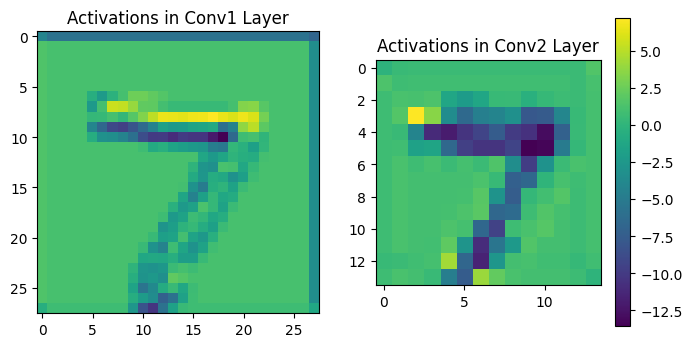

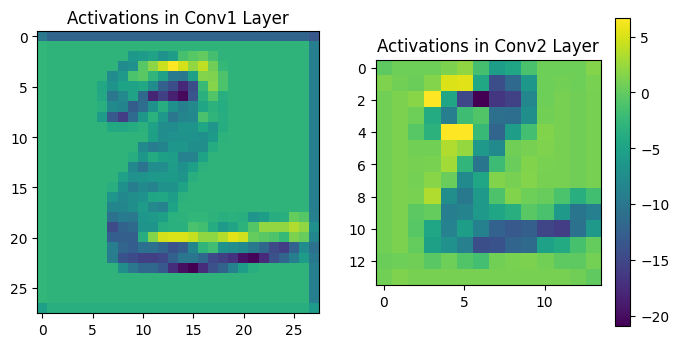

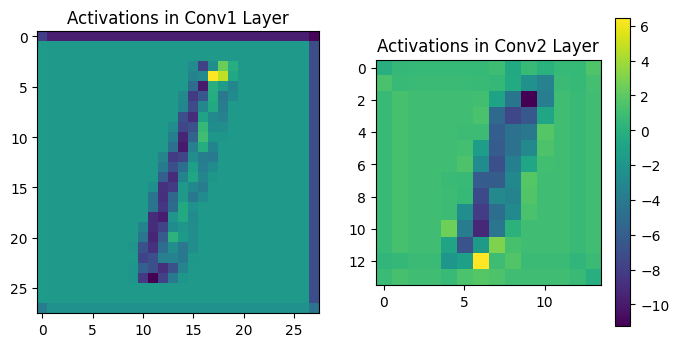

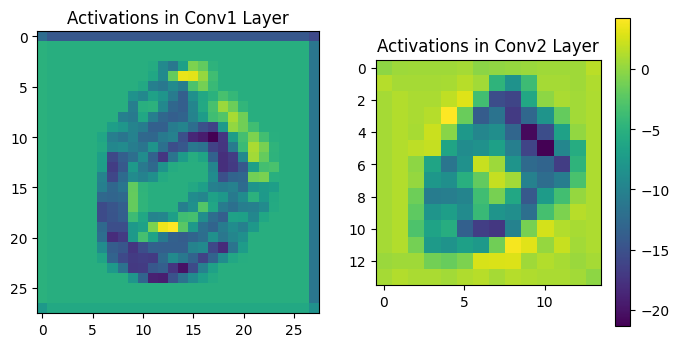

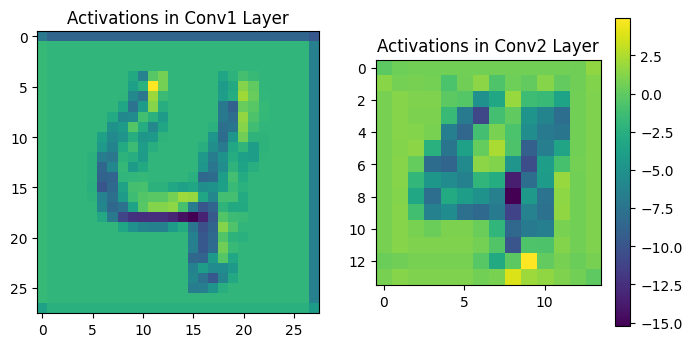

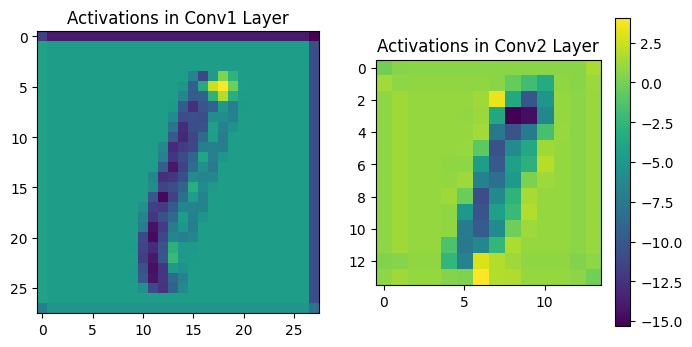

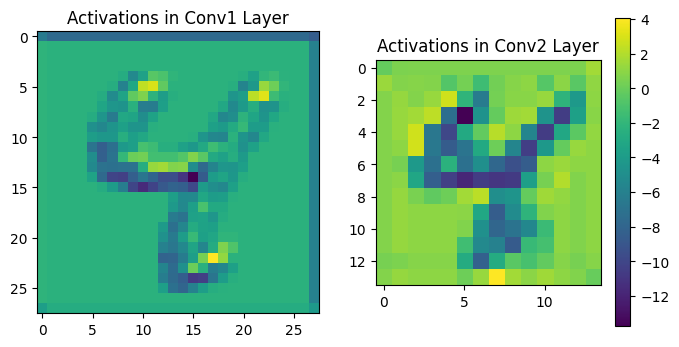

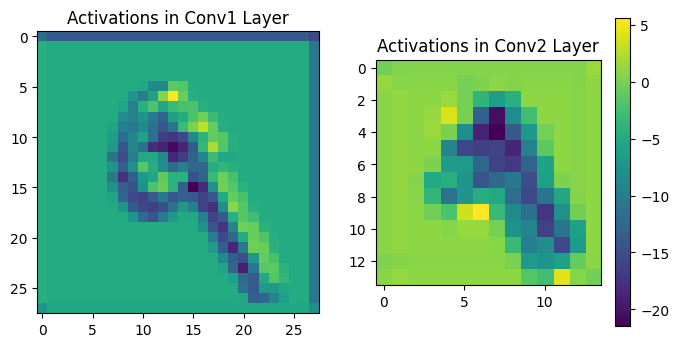

In [ ]:

def get_activations(model, layer_name, input_data):
    activations = []
    def hook(module, input, output):
        activations.append(output)
    layer = model._modules.get(layer_name)
    hook_handle = layer.register_forward_hook(hook)
    with torch.no_grad():
        model(input_data)
    hook_handle.remove()
    return activations[0]
#defining a function for multiple ploting
def plot(i):
        sample_image, _ = testset[i]
        sample_image = sample_image.unsqueeze(0)  # Add batch dimension
        activations_conv1 = get_activations(net, 'conv1', sample_image)
        activations_conv2 = get_activations(net, 'conv2', sample_image)

        # Plot activations for a single image
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.title('Activations in Conv1 Layer')
        plt.imshow(activations_conv1[0, 0, :, :], cmap='viridis')
        plt.subplot(1, 2, 2)
        plt.title('Activations in Conv2 Layer')
        plt.imshow(activations_conv2[0, 0, :, :], cmap='viridis')
        plt.colorbar()
        plt.show()

for i in range(0,8):
    plot(i)


1. As I have mentioned earlier about conv2 filters it works more towards detecting distinctivness. And we can see conv1 filters detecting edges more.
2. We may notice that conv2 filters respond to combinations of features detected by conv1 filters, leading to more abstract and hierarchical representations.

**Occluding parts of the image**

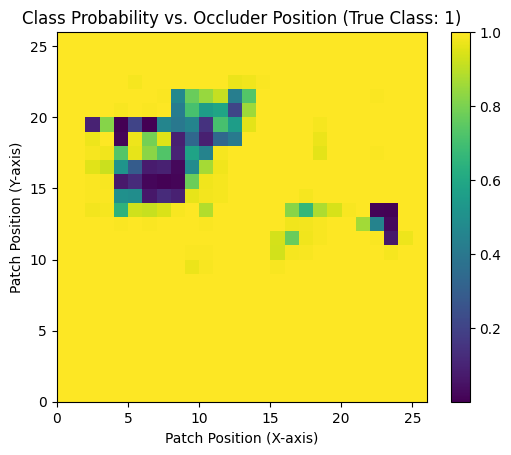

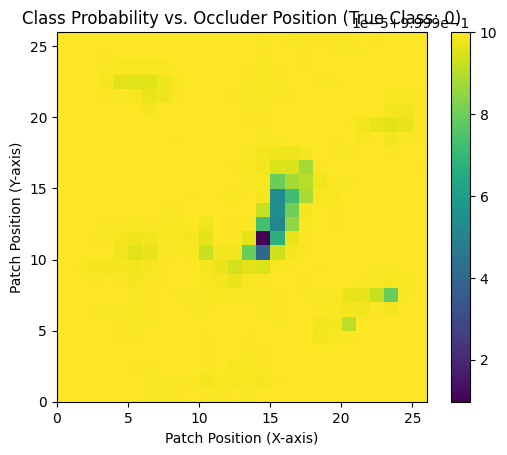

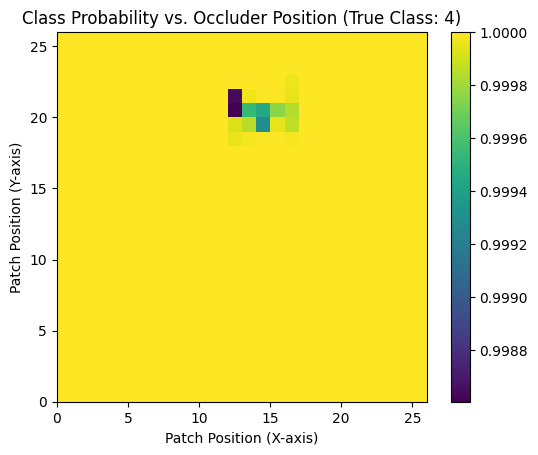

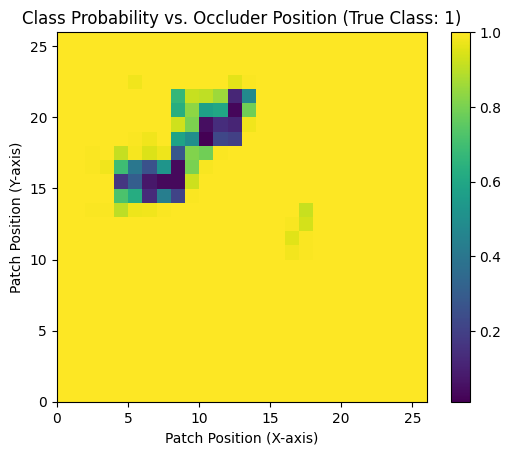

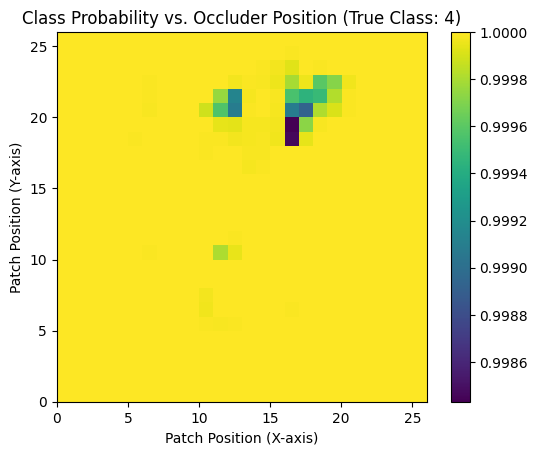

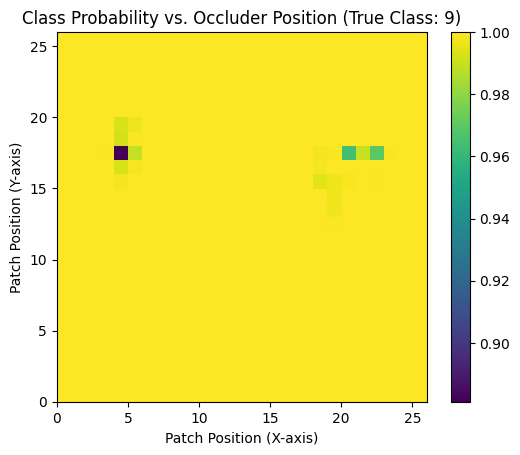

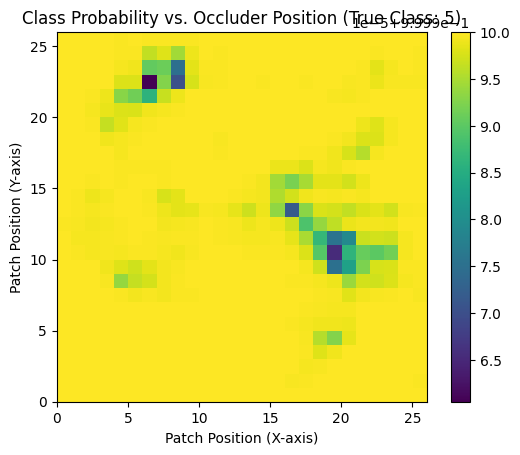

In [ ]:
def plot_occluading(i):
      random_image, true_label = testset[i]
      true_class = int(true_label)

      # Defining the occlusion size (e.g., 3x3 patch)
      occlusion_size = 3


      grid_size = 28 - occlusion_size + 1
      probability_grid = np.zeros((grid_size, grid_size))

      for i in range(grid_size):
          for j in range(grid_size):
              # Occlude the image with a gray patch
              occluded_image = random_image.clone()
              occluded_image[:, i:i+occlusion_size, j:j+occlusion_size] = 0.5  # Gray patch

              with torch.no_grad():
                  outputs = net(occluded_image.unsqueeze(0))

              # Get the probability of the true class
              class_probability = torch.softmax(outputs, dim=1)[0, true_class].item()

              # Store the probability in the grid
              probability_grid[i, j] = class_probability

      # Ploting the probability grid
      plt.imshow(probability_grid, cmap='viridis', extent=[0, grid_size, 0, grid_size])
      plt.colorbar()
      plt.title(f'Class Probability vs. Occluder Position (True Class: {true_class})')
      plt.xlabel('Patch Position (X-axis)')
      plt.ylabel('Patch Position (Y-axis)')
      plt.show()
for i in range(2,9):
    plot_occluading(i)

---

## **Adversarial Examples**

**Saving and loading the model**

In [ ]:
torch.save(net, 'mnist_cnn_model.pth')

In [ ]:
net = torch.load('mnist_cnn_model.pth') # loading the saved model

**Non targeted Attack**

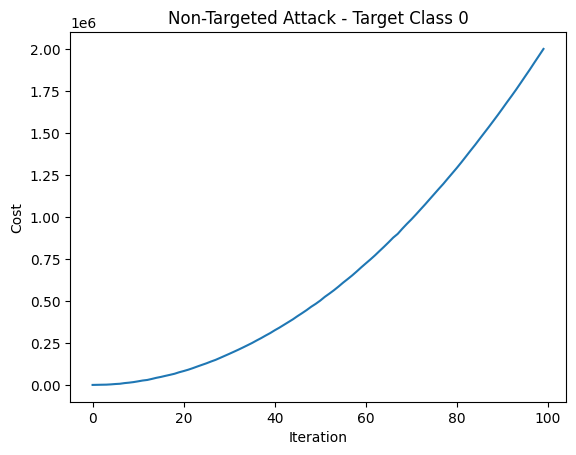

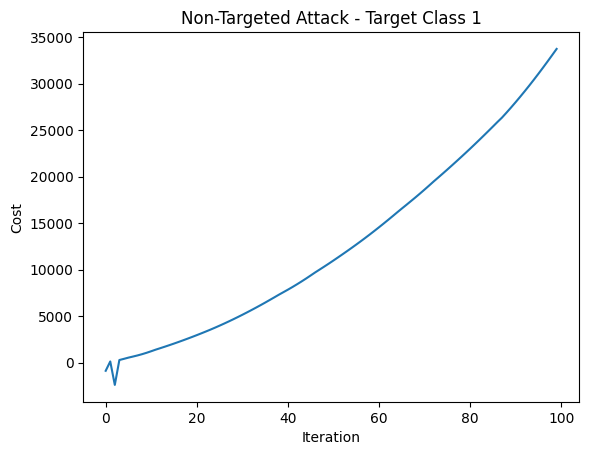

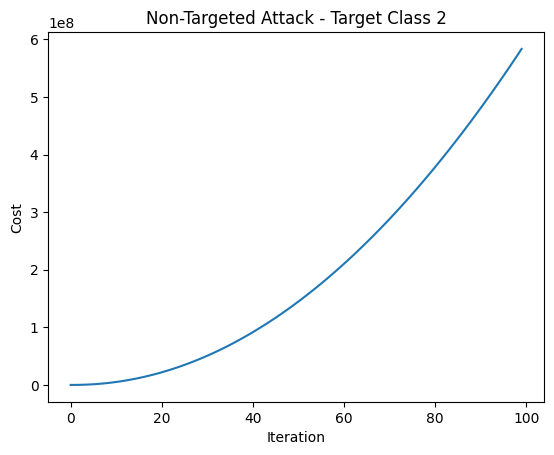

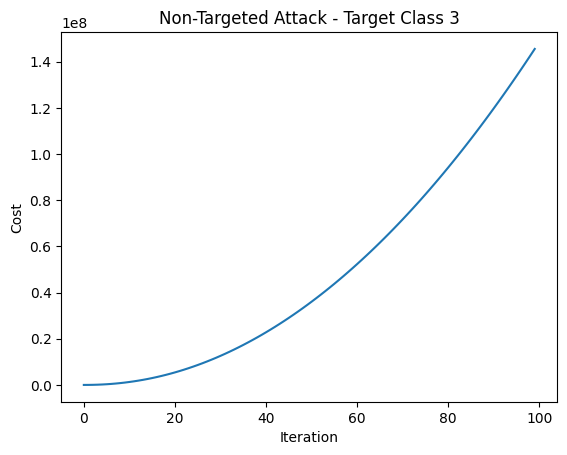

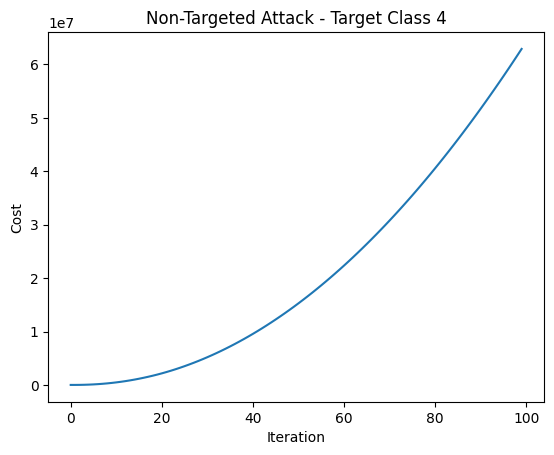

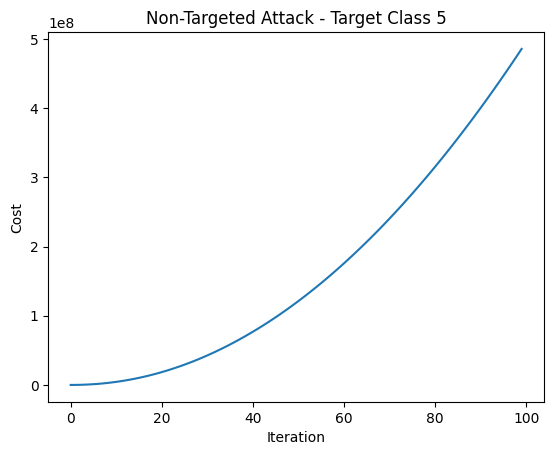

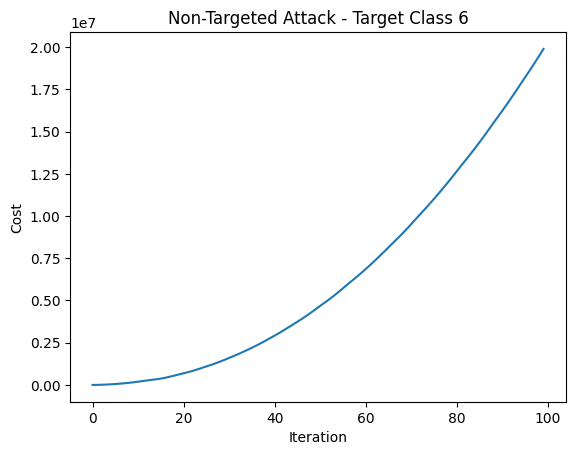

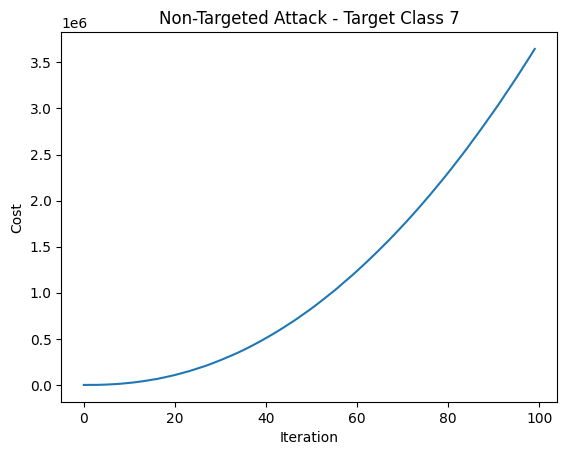

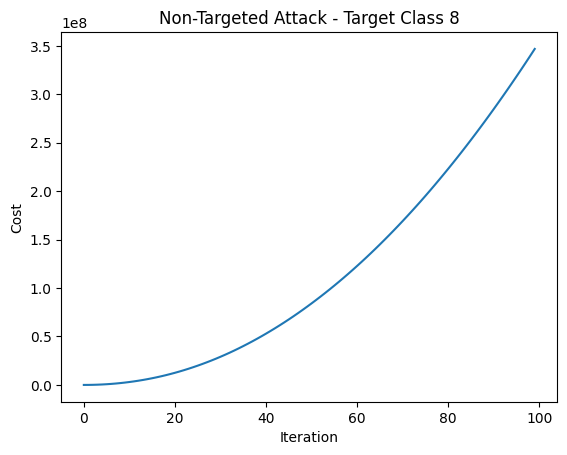

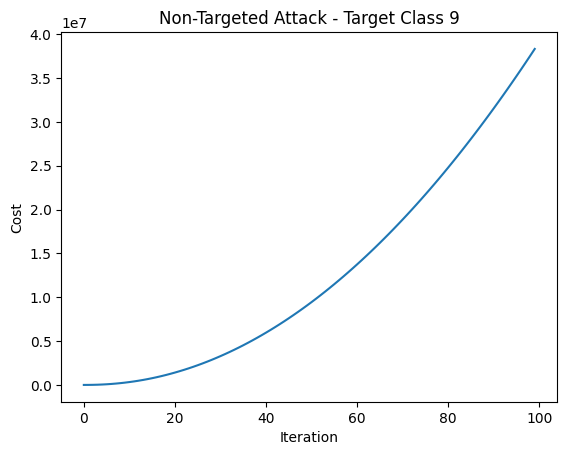

In [ ]:

def non_targeted_attack(net, target_class, num_iterations=100, step_size=0.1):

    image = torch.randn(1, 1, 28, 28, requires_grad=True)

    # Defining the cost function as logits for the target class
    cost_function = nn.CrossEntropyLoss()
    cost_history = []

    # Performing gradient ascent to maximize the target class score
    for iteration in range(num_iterations):
        logits = net(image)
        cost = -logits[0, target_class]
        # Backpropagation to compute gradients
        net.zero_grad()
        cost.backward()
        # Updating the image using the gradient and step size
        image.data += step_size * image.grad.data
        cost_history.append(cost.item())

    return image.detach(), cost_history

# Initializing a list to store generated images for each target class
generated_images = []

for target_class in range(10):
    generated_image, cost_history = non_targeted_attack(net, target_class)
    generated_images.append(generated_image)
    plt.plot(cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title(f'Non-Targeted Attack - Target Class {target_class}')
    plt.show()



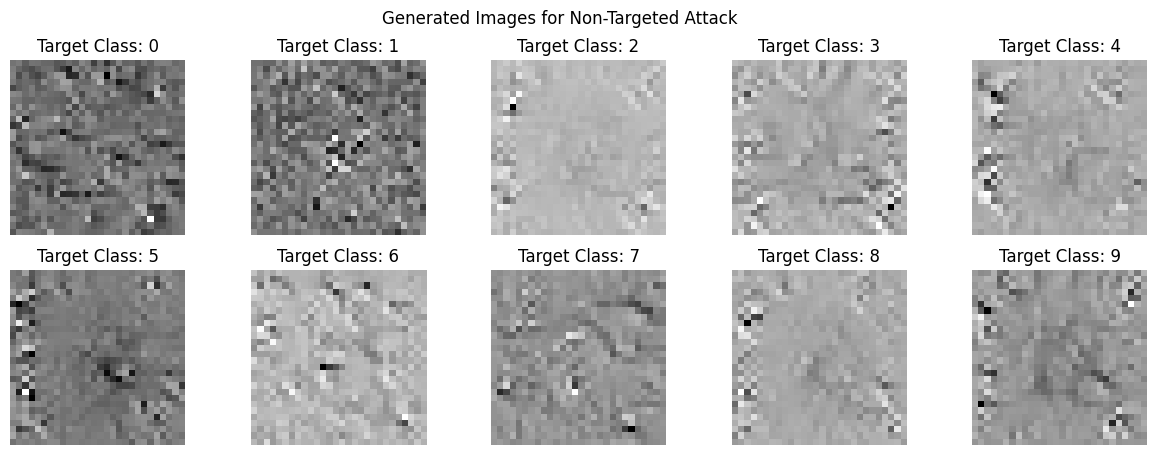

In [ ]:
# Ploting the generated images for each target class
plt.figure(figsize=(15, 5))
for i, generated_image in enumerate(generated_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_image[0][0].cpu().numpy(), cmap='gray')
    plt.title(f'Target Class: {i}')
    plt.axis('off')
plt.suptitle('Generated Images for Non-Targeted Attack')
plt.show()

The network may not always predict the target class with high confidence for the generated images, as the optimization process might not always converge to a high-confidence result. The generated image  may not look like numbers. The reason is that the optimization process aims to maximize the target class score without necessarily producing human-readable digits.


**Targeted Attack**

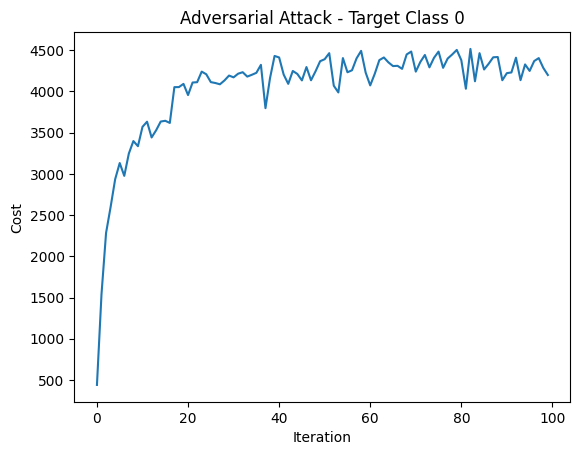

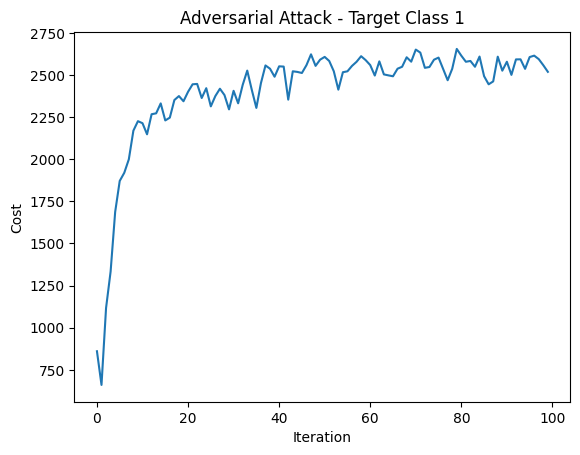

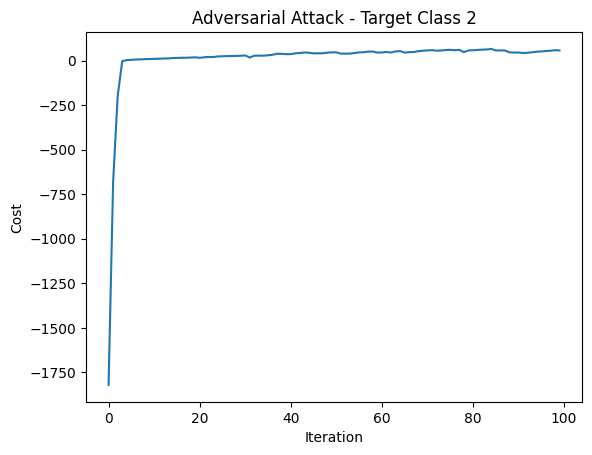

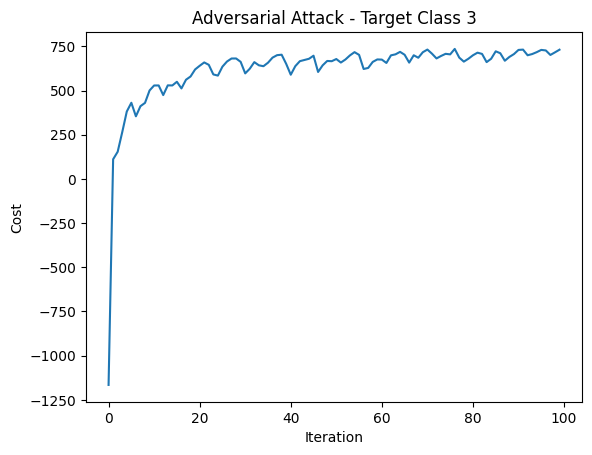

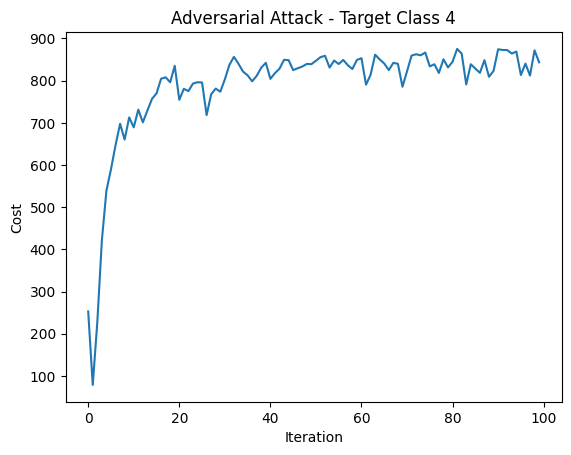

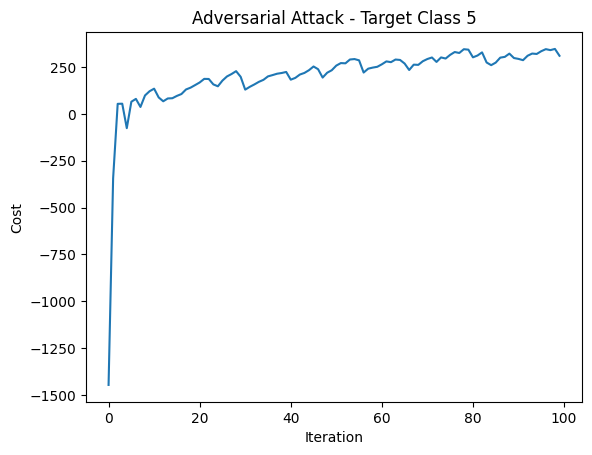

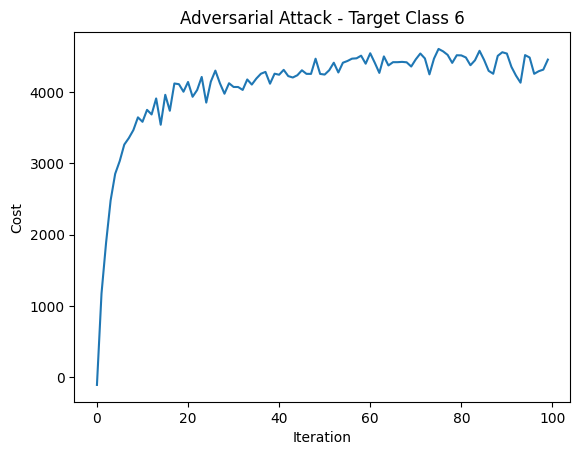

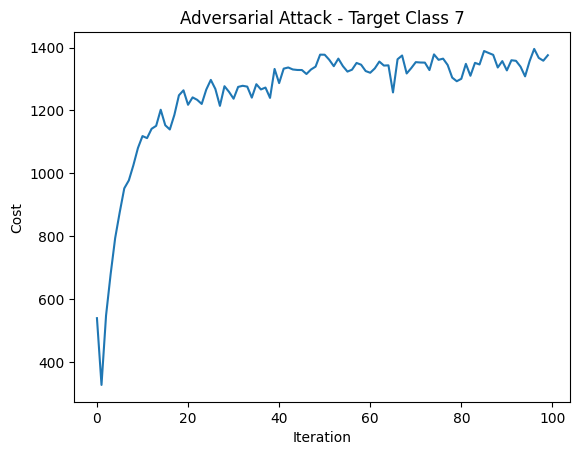

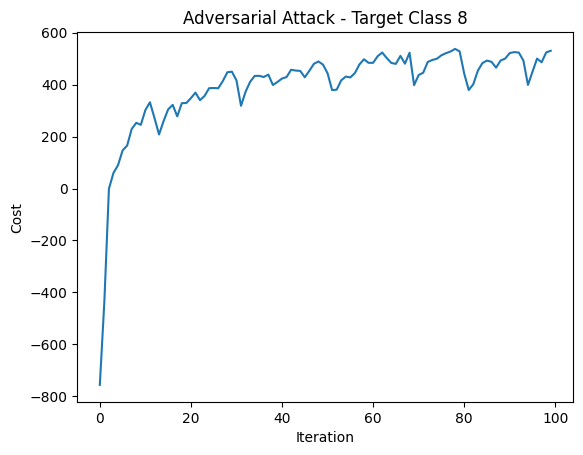

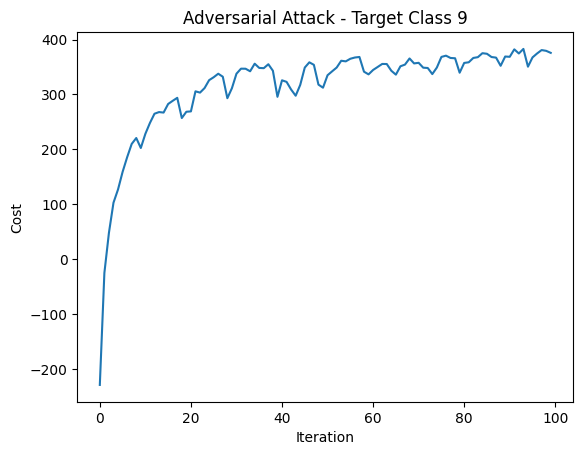

In [ ]:

# Function to perform the adversarial attack for a specific target class and target image
def adversarial_attack(net, target_class, target_image, beta=0.001, num_iterations=100, step_size=0.1):
    image = torch.randn(1, 1, 28, 28, requires_grad=True)
    cost_history = []

    # Perform gradient ascent to maximize the target class score and minimize MSE
    for iteration in range(num_iterations):

        logits = net(image)
        cost = logits[0, target_class] - beta * nn.MSELoss()(image, target_image)

        # Backpropagation to compute gradients
        net.zero_grad()
        cost.backward()
        image.data += step_size * image.grad.data
        image.data = torch.clamp(image.data, 0, 1)
        cost_history.append(cost.item())

    return image.detach(), cost_history


generated_images = []

# Performing adversarial attack for each target class (0-9)
for target_class in range(10):
    # Creating a target image that looks like the target class (e.g., a '2' for target_class 2)
    target_image = torch.zeros(1, 1, 28, 28)
    target_image[0, 0, 10:18, 12:20] = 1.0  # Set a region to resemble the target class
    target_image = torch.clamp(target_image, 0, 1)  # Clip to valid range

    generated_image, cost_history = adversarial_attack(net, target_class, target_image)
    generated_images.append(generated_image)

    # Ploting the cost function during optimization
    plt.plot(cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title(f'Adversarial Attack - Target Class {target_class}')
    plt.show()



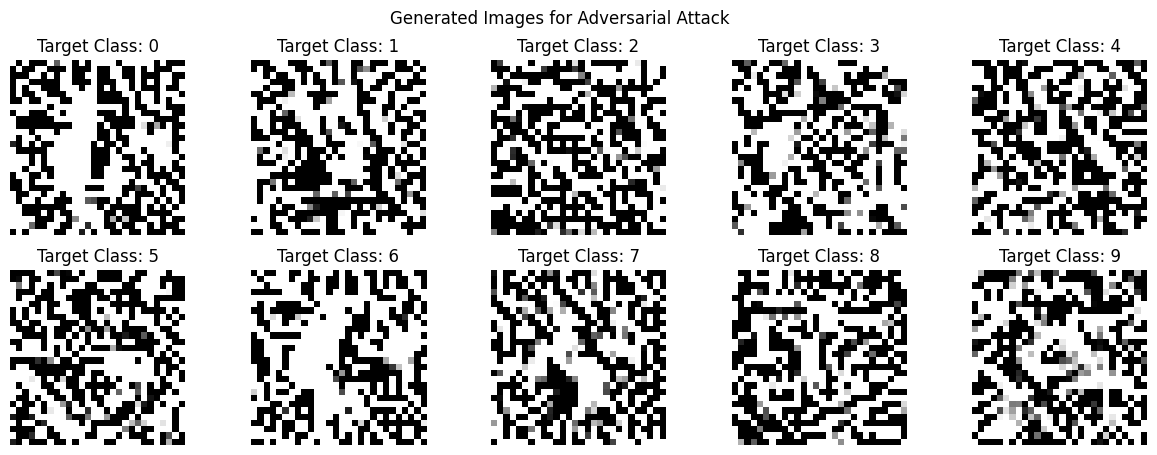

In [ ]:
# Plot the generated images for each target class
plt.figure(figsize=(15, 5))
for i, generated_image in enumerate(generated_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_image[0][0].cpu().numpy(), cmap='gray')
    plt.title(f'Target Class: {i}')
    plt.axis('off')
plt.suptitle('Generated Images for Adversarial Attack')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nbconvert
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/Assignment 2 EE5179"


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Assignment 2 EE5179.ipynb to PDF
[NbConvertApp] Support files will be in Assignment 2 EE5179_files/
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2 EE5179_files
[NbConvertApp] Making directory ./Assignment 2